Name: Shreyansh Tiwari

In [ ]:
import pandas as pd
car=pd.read_csv('car.csv')
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car[car['km_driven']>90000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
11,Tata Indigo Grand Petrol,2014,250000,100000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
4328,Mahindra Verito 1.5 D6 BSIII,2012,200000,112198,Diesel,Individual,Manual,Second Owner
4330,Tata Indica Vista Aqua 1.4 TDI,2010,150000,130000,Diesel,Individual,Manual,Second Owner
4331,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,530000,175000,Diesel,Individual,Manual,Third Owner
4332,Mahindra Scorpio S2 7 Seater,2015,750000,120000,Diesel,Individual,Manual,First Owner


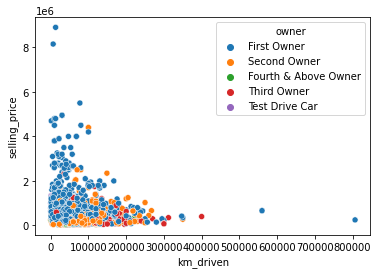

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x='km_driven',y='selling_price',data=car,hue='owner')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
car.name = le.fit_transform(car.name)
car.fuel = le.fit_transform(car.fuel)
car.seller_type = le.fit_transform(car.seller_type)
car.transmission = le.fit_transform(car.transmission)
car.owner = le.fit_transform(car.owner)

In [ ]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


In [ ]:
y=car[['selling_price']]
x=car[['year','km_driven','fuel','seller_type','transmission','owner']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_train.head()

,year,km_driven,fuel,seller_type,transmission,owner
4041,2018,56000,4,0,1,0
1757,2013,45241,4,0,1,0
2529,2010,80000,1,1,1,0
3255,2011,80000,1,1,1,0
4086,2008,120000,1,1,1,2


In [ ]:
y_train.head()

,selling_price
4041,315000
1757,495000
2529,100000
3255,133000
4086,325000


In [ ]:
x_test.head()

,year,km_driven,fuel,seller_type,transmission,owner
32,2011,175900,1,0,0,0
3220,2019,20000,4,1,1,0
1585,2010,110000,4,1,1,0
4028,2005,100000,4,1,1,1
2967,2010,70000,4,1,1,2


In [ ]:
y_test.head()

,selling_price
32,1190000
3220,210000
1585,130000
4028,175000
2967,300000


In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(x_test)
y_predict[0:5]

array([[1331333.15862226],
       [ 525757.75497381],
       [ 126055.22452457],
       [ -59621.89045849],
       [ 125936.42572095]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_predict)

164949283600.75806

In [ ]:
lr.intercept_

array([-69403258.989367])

In [ ]:
lr.coef_

array([[ 3.53015808e+04, -9.10981144e-01, -9.66453124e+04,
        -4.16161595e+04, -8.98457914e+05, -1.82790223e+04]])